## 연령대별 지출 및 저축 패턴 비교


In [2]:
import pandas as pd
import scipy.stats as stats
df_indian = pd.read_csv('../../datasets/Indian.csv')
df_indian.head(3)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422


In [3]:
df_indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [10]:
# 결측치 비율 확인
print("\n결측치 비율 확인:")
print(df_indian.isnull().mean() * 100)


결측치 비율 확인:
Income                             0.00
Age                                0.00
Dependents                         0.00
Occupation                         0.00
City_Tier                          0.00
Rent                               0.00
Loan_Repayment                     0.00
Insurance                          0.00
Groceries                          0.00
Transport                          0.00
Eating_Out                         0.00
Entertainment                      0.00
Utilities                          0.00
Healthcare                         0.00
Education                          0.00
Miscellaneous                      0.00
Desired_Savings_Percentage         0.00
Desired_Savings                    0.00
Disposable_Income                  0.00
Potential_Savings_Groceries        0.00
Potential_Savings_Transport        0.00
Potential_Savings_Eating_Out       0.00
Potential_Savings_Entertainment    0.00
Potential_Savings_Utilities        0.00
Potential_Savings_Healthcare

In [11]:
# 기본 통계량 파악
statistics = df_indian.describe()
statistics

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Rent_ratio,Groceries_ratio,Eating_Out_ratio,Entertainment_ratio,Utilities_ratio,Healthcare_ratio,Savings_Achievement
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,41.524964,62.417083,144.904987,0.420916,0.245635,0.068741,0.068361,0.117875,0.078473,0.433383
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,53.152458,98.842656,169.160951,0.062914,0.034452,0.017721,0.017693,0.024078,0.013723,0.242665
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.001238,0.000000,2.091973,0.293708,0.162447,0.032220,0.032277,0.064303,0.047074,-0.000000
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,11.037421,4.926210,47.637307,0.380706,0.220866,0.054450,0.053958,0.099205,0.068277,0.253898
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,25.202124,33.127987,93.090257,0.408507,0.244340,0.068160,0.067684,0.116863,0.077594,0.359168
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,52.353736,80.946145,178.257981,0.484482,0.271083,0.082012,0.081490,0.135673,0.088482,0.547613
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,1394.531049,3647.244243,4637.951137,0.570517,0.350938,0.123885,0.119977,0.189610,0.124761,1.000000


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [5]:
# 연령대 컬럼을 생성합니다.
bins = [20, 29, 39, 49, 59, 100]
labels = ['20대', '30대', '40대', '50대', '60대 이상']
df_indian['Age_Group'] = pd.cut(df_indian['Age'], bins=bins, labels=labels, right=False)

# 연령대별로 데이터 확인
df_indian['Age_Group'].value_counts()


Age_Group
40대       4386
50대       4202
30대       4145
20대       3850
60대 이상    2559
Name: count, dtype: int64

In [6]:
# 연령대별 주요 지출 항목 평균
age_group_expenses = df_indian.groupby('Age_Group')[['Rent', 'Groceries', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare']].mean()

# 연령대별 평균 지출 비율 계산 (전체 지출 대비 비율)
total_expenses = df_indian[['Rent', 'Groceries', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare']].sum(axis=1)
for col in ['Rent', 'Groceries', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare']:
    df_indian[f'{col}_ratio'] = df_indian[col] / total_expenses

# 연령대별 평균 비율
age_group_expenses_ratio = df_indian.groupby('Age_Group')[['Rent_ratio', 'Groceries_ratio', 'Eating_Out_ratio', 'Entertainment_ratio', 'Utilities_ratio', 'Healthcare_ratio']].mean()


/tmp/ipykernel_18809/1364353501.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_expenses = df_indian.groupby('Age_Group')[['Rent', 'Groceries', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare']].mean()
/tmp/ipykernel_18809/1364353501.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_expenses_ratio = df_indian.groupby('Age_Group')[['Rent_ratio', 'Groceries_ratio', 'Eating_Out_ratio', 'Entertainment_ratio', 'Utilities_ratio', 'Healthcare_ratio']].mean()


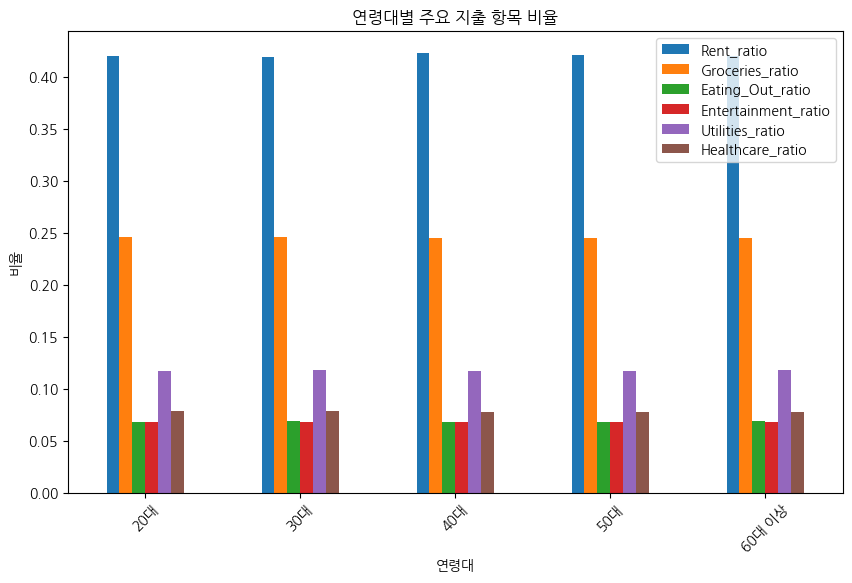

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 지출 항목 비율을 시각화
age_group_expenses_ratio.plot(kind='bar', figsize=(10, 6))
plt.title('연령대별 주요 지출 항목 비율')
plt.ylabel('비율')
plt.xlabel('연령대')
plt.xticks(rotation=45)
plt.show()


In [8]:
# 연령대별 저축 비율
age_group_savings = df_indian.groupby('Age_Group')['Desired_Savings_Percentage'].mean()

# 목표 달성률 계산 (실제 저축액이 목표 저축액에 도달한 비율)
df_indian['Savings_Achievement'] = df_indian['Desired_Savings'] / df_indian['Disposable_Income']
age_group_savings_achievement = df_indian.groupby('Age_Group')['Savings_Achievement'].mean()


/tmp/ipykernel_18809/3421269003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_savings = df_indian.groupby('Age_Group')['Desired_Savings_Percentage'].mean()
/tmp/ipykernel_18809/3421269003.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_savings_achievement = df_indian.groupby('Age_Group')['Savings_Achievement'].mean()


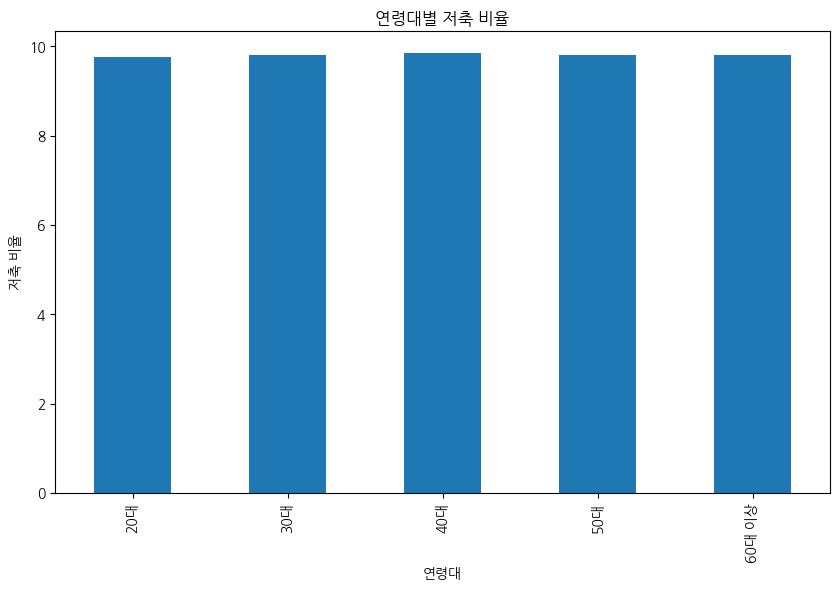

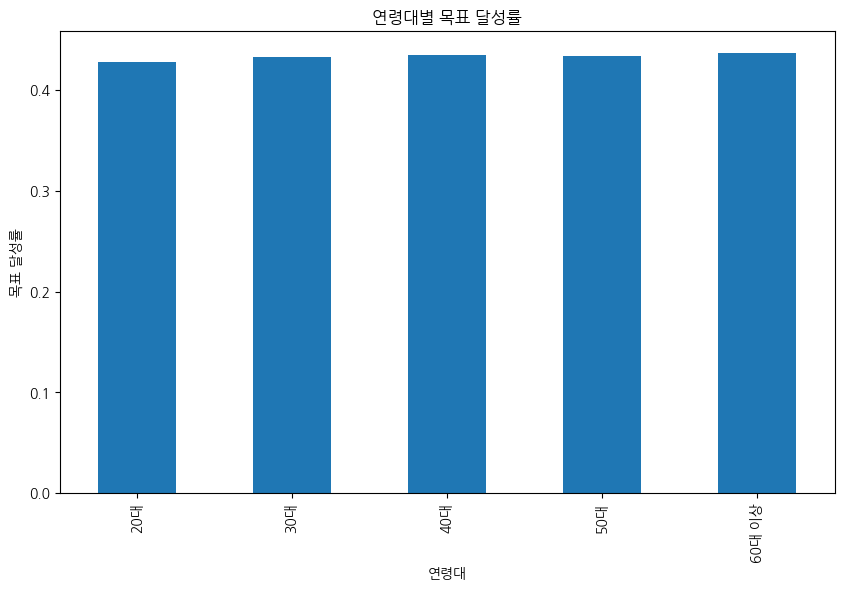

In [9]:
# 연령대별 저축 비율
age_group_savings.plot(kind='bar', figsize=(10, 6))
plt.title('연령대별 저축 비율')
plt.xlabel('연령대')
plt.ylabel('저축 비율')
plt.show()

# 연령대별 목표 달성률
age_group_savings_achievement.plot(kind='bar', figsize=(10, 6))
plt.title('연령대별 목표 달성률')
plt.xlabel('연령대')
plt.ylabel('목표 달성률')
plt.show()
